In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
density_filename = "../data/results/jc/MultiDark/Rvir_Mvir_fitparams_Multidark.dat"
velocity_filename = "../data/results/MDmini/velocity/results.csv"
mass_filename = "../data/results/MDmini/mass/results.csv"

In [37]:
data_density = loadtxt(density_filename)
data_velocity = loadtxt(velocity_filename, delimiter=",")
data_mass = loadtxt(mass_filename, delimiter=",")

In [38]:
# mass here is the virial mass
mass_density = data_density[:,1]*1.0E10
conc_density = data_density[:,0]/data_density[:,2]
log_mass_density = log10(mass_density)

particle_mass = 8.721E9

mass_velocity = data_velocity[:,7]*particle_mass
conc_velocity = data_velocity[:,4]
log_mass_velocity = log10(mass_velocity)

mass_mass  = data_mass[:,8]*particle_mass
conc_mass = data_mass[:,4]
log_mass_mass = log10(mass_mass)

(0.0, 50.0)

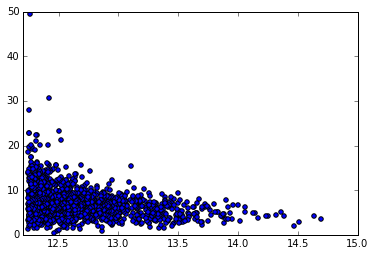

In [39]:
scatter(log10(mass_density), conc_density)
xlim([12.2,15.0])
ylim([0.0,50.0])

(0.0, 50.0)

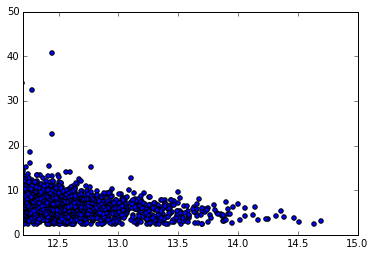

In [40]:
scatter(log10(mass_velocity), conc_velocity)
xlim([12.2,15.0])
ylim([0.0,50.0])

(0.0, 50.0)

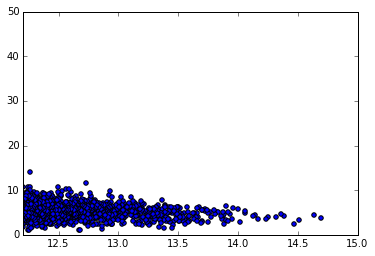

In [41]:
scatter(log10(mass_mass), conc_mass)
xlim([12.2,15.0])
ylim([0.0,50.0])

In [42]:
n_bins = 7
log_mass_interval = linspace(12.4,14.5,n_bins)
mid_log_mass_interval = 0.5*(log_mass_interval[1:] + log_mass_interval[:-1])
conc_median = ones((n_bins-1,3))
conc_up = ones((n_bins-1,3))
conc_down = ones((n_bins-1,3))

for i in range(n_bins-1):
    mass_index = where((log_mass_density>log_mass_interval[i]) & (log_mass_density<log_mass_interval[i+1]))
    conc_index = conc_density[mass_index]
    print size(mass_index)
    median_conc_index = percentile(conc_index, 50)
    conc_median[i,0] = median_conc_index
    median_conc_index = percentile(conc_index, 25)
    conc_down[i,0] = median_conc_index
    median_conc_index = percentile(conc_index, 75)
    conc_up[i,0] = median_conc_index
    
    mass_index = where((log_mass_velocity>log_mass_interval[i]) & (log_mass_velocity<log_mass_interval[i+1]))
    conc_index = conc_velocity[mass_index]
    print size(mass_index)
    median_conc_index = percentile(conc_index, 50)
    conc_median[i,1] = median_conc_index
    median_conc_index = percentile(conc_index, 25)
    conc_down[i,1] = median_conc_index
    median_conc_index = percentile(conc_index, 75)
    conc_up[i,1] = median_conc_index
    
    mass_index = where((log_mass_mass>log_mass_interval[i]) & (log_mass_mass<log_mass_interval[i+1]))
    conc_index = conc_mass[mass_index]
    print size(mass_index)
    median_conc_index = percentile(conc_index, 50)
    conc_median[i,2] = median_conc_index
    median_conc_index = percentile(conc_index, 25)
    conc_down[i,2] = median_conc_index
    median_conc_index = percentile(conc_index, 75)
    conc_up[i,2] = median_conc_index
    print""

691
691
691

299
299
299

140
140
140

58
58
58

22
22
22

7
7
7



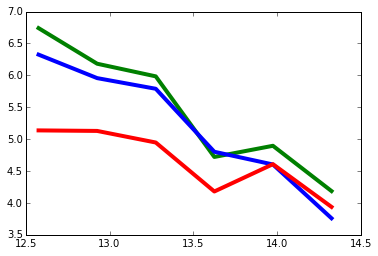

In [43]:
colores = ['green', 'blue', 'red']
for i in range(3):
    #fill_between(mid_log_mass_interval, conc_down[:,i], conc_up[:,i], alpha=0.4, color=colores[i])
    plot(mid_log_mass_interval, conc_median[:,i], linewidth=4, color=colores[i])


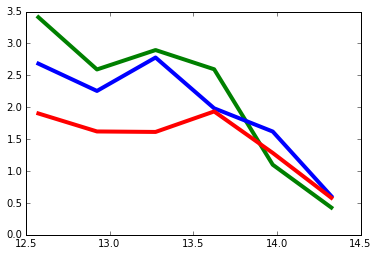

In [44]:
for i in range(3):
    plot(mid_log_mass_interval, conc_up[:,i] - conc_down[:,i], linewidth=4, color=colores[i])

In [61]:
index_greater = where(log_mass_density>12.5)
index_greater = index_greater[0]
print size(index_greater)
sort_index = argsort(log_mass_density[index_greater])
conc_density_sorted = conc_density[index_greater[sort_index]]

index_greater = where(log_mass_velocity>12.5)
index_greater = index_greater[0]
print size(index_greater)
sort_index = argsort(log_mass_velocity[index_greater])
conc_velocity_sorted = conc_velocity[index_greater[sort_index]]

index_greater = where(log_mass_mass>12.5)
index_greater = index_greater[0]
print size(index_greater)
sort_index = argsort(log_mass_mass[index_greater])
conc_mass_sorted = conc_mass[index_greater[sort_index]]


967
967
967


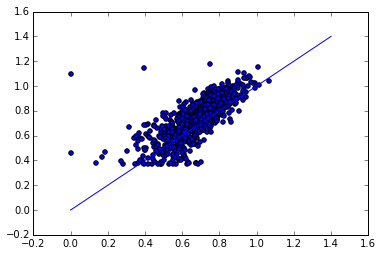

In [66]:
scatter(log10(conc_mass_sorted), log10(conc_velocity_sorted))
x = linspace(0.0,1.4, 100)
plot(x,x)

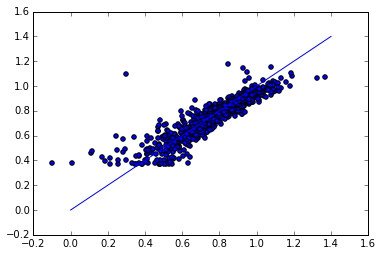

In [70]:
scatter(log10(conc_density_sorted), log10(conc_velocity_sorted))
plot(x,x)

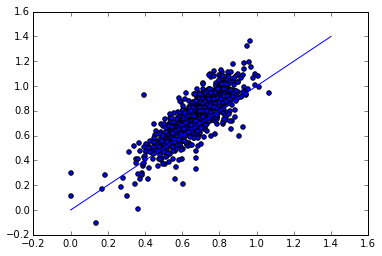

In [71]:
scatter(log10(conc_mass_sorted), log10(conc_density_sorted))
plot(x,x)